In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url_test_set='https://raw.githubusercontent.com/TheWeenhayek/real_state_calculator_LP/master/TestVF.csv'
test_set=pd.read_csv(url_test_set, sep=';')

In [4]:
url_train_set='https://raw.githubusercontent.com/TheWeenhayek/real_state_calculator_LP/master/TrainVF.csv'
train_set=pd.read_csv(url_train_set, sep=';')

In [5]:
train_set

,N,Superficie_m2,Dormitorios,Bao,Cocina,Garaje,Lavandera,Zona,Precio
0,50,46,1,1,1,SI,SI,ACHUMANI,42000
1,48,47,1,1,1,NO,NO,ACHUMANI,43000
2,107,49,1,2,1,NO,NO,COTA COTA,45500
3,91,44,1,2,1,NO,NO,OBRAJES,49000
4,18,30,1,1,1,NO,NO,OBRAJES,50000
...,...,...,...,...,...,...,...,...,...
135,62,232,4,3,1,SI,SI,CALACOTO,315000
136,11,220,3,4,1,SI,SI,ALTO CALACOTO,320000
137,131,221,4,3,1,SI,SI,CALACOTO,350000
138,128,400,4,2,1,SI,SI,ACHUMANI,432000


In [6]:
train_set.head()

,N,Superficie_m2,Dormitorios,Bao,Cocina,Garaje,Lavandera,Zona,Precio
0,50,46,1,1,1,SI,SI,ACHUMANI,42000
1,48,47,1,1,1,NO,NO,ACHUMANI,43000
2,107,49,1,2,1,NO,NO,COTA COTA,45500
3,91,44,1,2,1,NO,NO,OBRAJES,49000
4,18,30,1,1,1,NO,NO,OBRAJES,50000


In [7]:
test_set.head()

,N,Superficie_m2,Dormitorios,Bao,Cocina,Garaje,Lavandera,Zona,Precio
0,141,149,2,3,1,SI,SI,CALACOTO,228000
1,142,46,1,1,1,NO,NO,ACHUMANI,420000
2,143,148,3,3,1,SI,SI,MIRAFLORES,220000
3,144,186,4,3,1,SI,SI,ALTO CALACOTO,165000
4,145,245,4,5,1,SI,SI,COTA COTA,220000


In [8]:
#Reemplazamos los valores textuales por datos numericos para las columnas...
train_set['Garaje'].replace(['SI','NO'],[1,0],inplace=True)

In [9]:
test_set['Garaje'].replace(['SI','NO'],[1,0],inplace=True)

In [10]:
train_set['Zona'].replace(['ALTO CALACOTO','CALACOTO','ACHUMANI','ALTO OBRAJES','COTA COTA','MIRAFLORES','OBRAJES'],[6,5,4,3,2,1,0],inplace=True)

In [11]:
test_set['Zona'].replace(['ALTO CALACOTO','CALACOTO','ACHUMANI','ALTO OBRAJES','COTA COTA','MIRAFLORES','OBRAJES'],[6,5,4,3,2,1,0],inplace=True)

In [12]:

test_set['Lavandera'].replace(['SI','NO'],[1,0],inplace=True)

In [13]:
train_set['Lavandera'].replace(['SI','NO'],[1,0],inplace=True)


In [14]:
test_set.head(20)

,N,Superficie_m2,Dormitorios,Bao,Cocina,Garaje,Lavandera,Zona,Precio
0,141,149,2,3,1,1,1,5,228000
1,142,46,1,1,1,0,0,4,420000
2,143,148,3,3,1,1,1,1,220000
3,144,186,4,3,1,1,1,6,165000
4,145,245,4,5,1,1,1,2,220000
5,146,206,3,3,1,1,1,6,335000
6,147,84,2,2,1,0,1,2,81869
7,148,46,1,1,1,0,0,0,50600
8,149,174,4,5,1,1,1,2,165000
9,150,182,3,4,1,1,1,2,180000


In [15]:
#Borramos las columnas que no nos sirven en la predicción
train_set=train_set.drop(['Cocina','N'],axis=1)


In [16]:
test_set=test_set.drop(['Cocina'],axis=1)

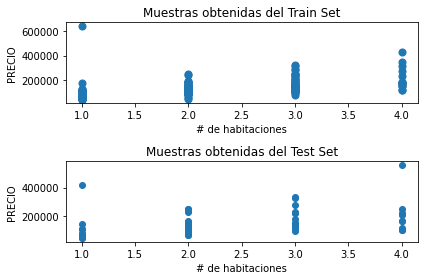

In [17]:
plt.figure()
plt.subplot(211)
plt.scatter(train_set.Dormitorios, train_set.Precio, s=50)
plt.ylabel("PRECIO")
plt.xlabel("# de habitaciones")
plt.title('Muestras obtenidas del Train Set')
plt.subplot(212)
plt.scatter(test_set.Dormitorios, test_set.Precio)
plt.ylabel("PRECIO")
plt.xlabel("# de habitaciones")
plt.title('Muestras obtenidas del Test Set')
plt.tight_layout()


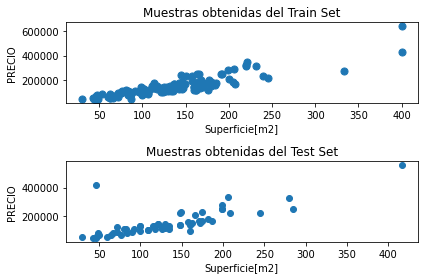

In [18]:
plt.figure()
plt.subplot(211)
plt.scatter(train_set.Superficie_m2, train_set.Precio, s=50)
plt.ylabel("PRECIO")
plt.xlabel("Superficie[m2]")
plt.title('Muestras obtenidas del Train Set')
plt.subplot(212)
plt.scatter(test_set.Superficie_m2, test_set.Precio)
plt.ylabel("PRECIO")
plt.xlabel("Superficie[m2]")
plt.title('Muestras obtenidas del Test Set')
plt.tight_layout()

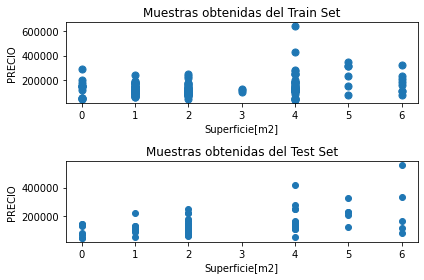

In [19]:
plt.figure()
plt.subplot(211)
plt.scatter(train_set.Zona, train_set.Precio, s=50)
plt.ylabel("PRECIO")
plt.xlabel("Superficie[m2]")
plt.title('Muestras obtenidas del Train Set')
plt.subplot(212)
plt.scatter(test_set.Zona, test_set.Precio)
plt.ylabel("PRECIO")
plt.xlabel("Superficie[m2]")
plt.title('Muestras obtenidas del Test Set')
plt.tight_layout()

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X=np.array(train_set.drop(["Precio"],1))

In [23]:
Y=np.array(train_set["Precio"])


In [24]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3)

In [25]:
print(X_train.shape,Y_train.shape)
print(type(X_train),type(Y_train))

(98, 6) (98,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [26]:
X_train[0]

array([85,  2,  2,  0,  1,  2])

In [27]:
lr= LinearRegression()
lr.fit(X_train, Y_train)
confianza=lr.score(X_test,Y_test)

In [28]:
print(confianza)

0.7687812708177247


In [29]:
#hacemos uso de la predicción que ya habiamos entrenado con el algoritmo 
ids=test_set['N']

In [30]:
prediccion_linreg=lr.predict(test_set.drop(['N','Precio'],axis=1))#prediciendo....

In [31]:
out_linreg=pd.DataFrame({'N':ids,'precio':prediccion_linreg})

print('Regresión lineal')
print(out_linreg.head(15))#imprimiendo los 10 primeros valores

Regresión lineal
      N         precio
0   141  174602.822957
1   142   56292.470570
2   143  162012.814968
3   144  214049.407912
4   145  280439.643393
5   146  232492.769458
6   147   93002.878435
7   148   44064.646363
8   149  212873.137007
9   150  208661.185072
10  151  121436.474256
11  152  114252.653395
12  153   60444.575505
13  154   90090.848699
14  155  150609.766335


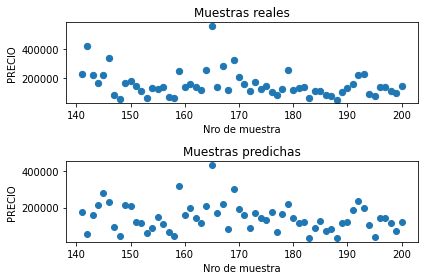

In [32]:
plt.figure()
plt.subplot(211)
plt.scatter(test_set.N, test_set.Precio, s=40)
plt.ylabel("PRECIO")
plt.xlabel("Nro de muestra")
plt.title('Muestras reales')
plt.subplot(212)
plt.scatter(out_linreg.N, out_linreg.precio)
plt.ylabel("PRECIO")
plt.xlabel("Nro de muestra")
plt.title('Muestras predichas')
plt.tight_layout()

In [33]:
test_set.head()

,N,Superficie_m2,Dormitorios,Bao,Garaje,Lavandera,Zona,Precio
0,141,149,2,3,1,1,5,228000
1,142,46,1,1,0,0,4,420000
2,143,148,3,3,1,1,1,220000
3,144,186,4,3,1,1,6,165000
4,145,245,4,5,1,1,2,220000


In [ ]:
num_array = list()
for i in range(7):
    if i==1:
      n = input("Inserte el valor de la superficie del departamento en metros cuadrados (Ej: 100):")
      num_array.append(int(n))
    if i==2:
      n = input("Inserte el número de dormitorios que desea que tenga su departamento (Ej: 2):")
      num_array.append(int(n))
    if i==3:
      n = input("Inserte el número de baños que desea que tenga su departamento (Ej: 1):")
      num_array.append(int(n))
    if i==4:
      n = input("¿Desea tener acceso a GARAJE? Inserte 1 si la respuesta es positiva y 0 en caso contrario (Ej: 1):")
      num_array.append(int(n))
    if i==5:
      n = input("¿Desea tener acceso a LAVANDERÍA? Inserte 1 si la respuesta es positiva y 0 en caso contrario (Ej: 1):")
      num_array.append(int(n))
    if i==6:
      n = input("¿En que zona desea que se encuetre su departamento?\n Si es ALTO CALACOTO    coloque 6\n Si es CALACOTO         coloque 5\n Si es ACHUMANI         coloque 4\n Si es ALTO OBRAJES     coloque 3\n Si es COTA COTA        coloque 2\n Si es MIRAFLORES       coloque 1\n Si es OBRAJES          coloque 0:  ")
      num_array.append(int(n))  
prediccion_linreg2=lr.predict([num_array])#prediciendo....
print ("El valor de su departamento en dólares es: ")
print(prediccion_linreg2)

Inserte el valor de la superficie del departamento en metros cuadrados (Ej: 100):100
Inserte el número de dormitorios que desea que tenga su departamento (Ej: 2):2
Inserte el número de baños que desea que tenga su departamento (Ej: 1):1
¿Desea tener acceso a GARAJE? Inserte 1 si la respuesta es positiva y 0 en caso contrario (Ej: 1):1
¿Desea tener acceso a LAVANDERÍA? Inserte 1 si la respuesta es positiva y 0 en caso contrario (Ej: 1):1


In [ ]:
print ('\033[1m' + 'Hello')

Hello
